In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

In [35]:
data_val = pd.read_csv('../data/val_data_stg7_clipped.csv')
data_val['intensities'] = data_val['intensities'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [36]:
data_val.head()

,time,intensities,cond_vector
0,2024-12-04 15:38:53.462969780,"(0.0, 0.0, 0.0, 4.81, 6.17, 0.0, 2.74, 1.86, 1...","[-0.6222, 0.1626, -0.3527, -1.4393, -1.0, -1.0..."
1,2024-12-04 15:38:56.587590218,"(1.77, 0.0, 0.02, 3.81, 7.17, 0.0, 0.74, 3.86,...","[-0.6222, 0.1626, -0.3652, -1.4122, -1.0, -1.0..."
2,2024-12-04 15:39:01.867878437,"(0.0, 0.69, 0.0, 5.81, 7.17, 0.0, 3.74, 1.86, ...","[-0.6222, 0.1626, -0.3439, -1.3689, -1.0, -1.0..."
3,2024-12-04 15:39:03.978704929,"(1.77, 0.0, 0.0, 2.81, 8.17, 0.0, 0.0, 0.86, 0...","[-0.6222, 0.1626, -0.3439, -1.3279, 0.0, -1.0,..."
4,2024-12-04 15:39:06.037250996,"(0.0, 0.0, 0.0, 7.81, 6.17, 0.0, 2.74, 2.86, 0...","[-0.6222, 0.1626, -0.3439, -1.369, -1.0, -1.0,..."


In [85]:
wavelengths = np.load('../data/wavelengths.npy')

In [38]:
type(np.array(data_val.iloc[1]['intensities']))

numpy.ndarray

/tmp/ipykernel_558338/4089654103.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


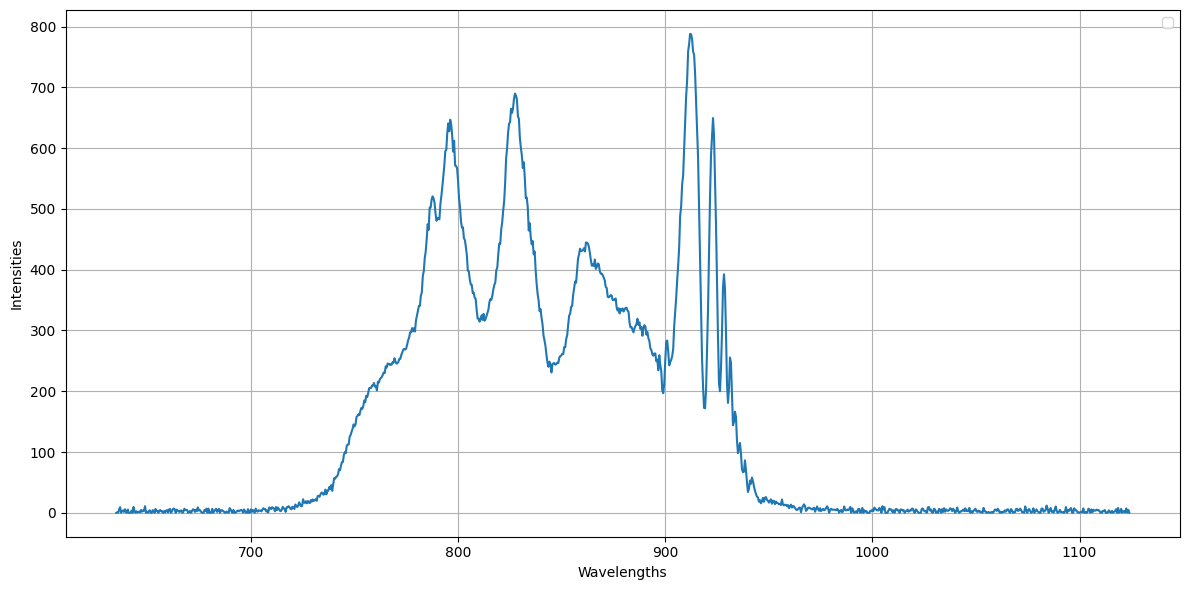

In [39]:
vector = np.array(data_val.iloc[1000]['intensities'])

plt.figure(figsize=(12, 6))

plt.plot(wavelengths, vector)

plt.xlabel("Wavelengths")
plt.ylabel("Intensities")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
sample_spectrum = data_val.head(1001).tail(1)
type(sample_spectrum)

pandas.core.frame.DataFrame

In [33]:
sample_spectrum.to_csv("../data/sample_spectrum_stgF.csv", index = False)

/tmp/ipykernel_558338/3292852637.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noised = torch.sqrt(torch.tensor(alpha_val)) * vector + torch.sqrt(1 - alpha_val) * eps


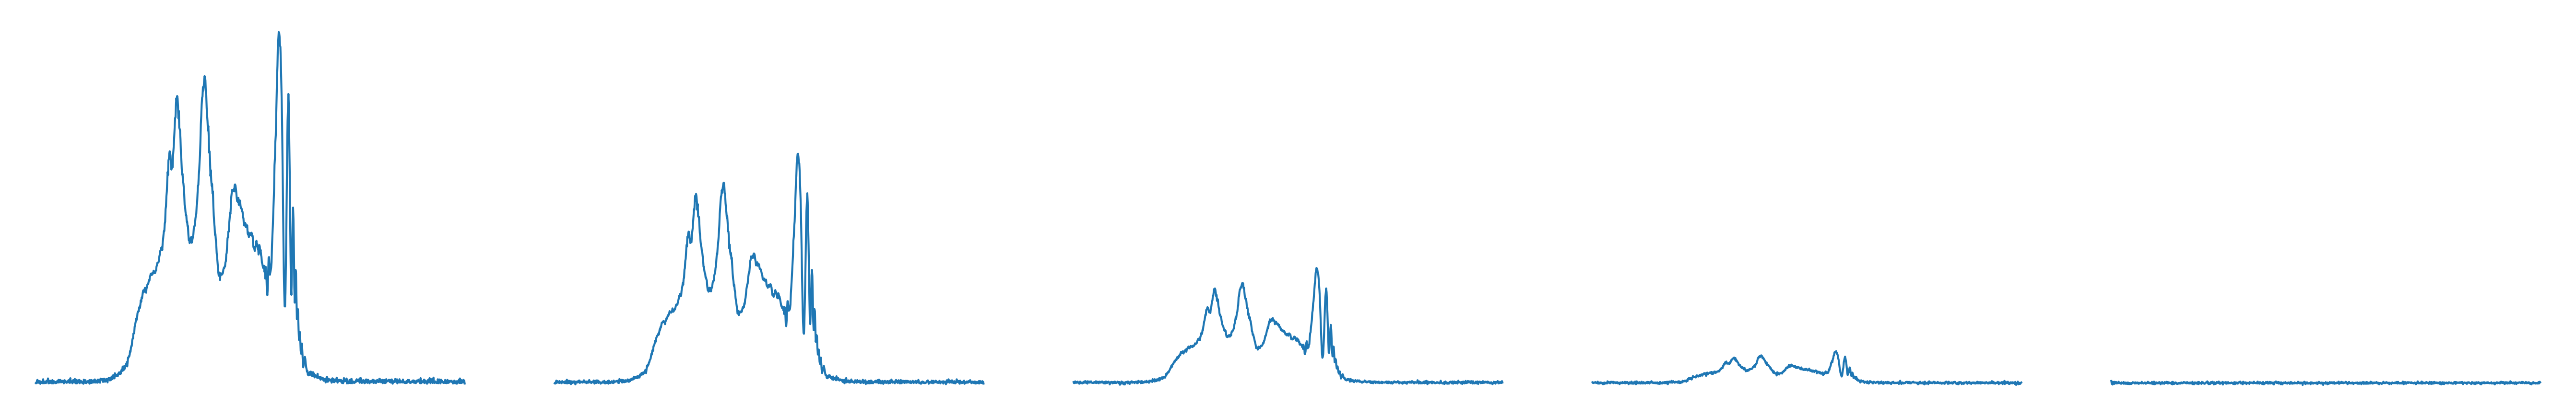

In [63]:
# Load your vector
vector = np.array(data_val.iloc[1000]['intensities'])  # Replace with your real DataFrame
vector = torch.tensor(vector, dtype=torch.float32)

# Noise schedule parameters
noise_steps = 5
beta_start = 0.5
beta_end = 1
timesteps = torch.linspace(0, 1, noise_steps)

# Define cosine noise schedule manually for each step
beta_schedule = beta_end + 0.5 * (beta_start - beta_end) * (1 + torch.cos(timesteps * torch.pi))
alpha = 1 - beta_schedule
alpha_hat = torch.cumprod(alpha, dim=0)

# Generate noisy versions
noised_vectors = []
for i in range(noise_steps):
    eps = torch.randn_like(vector)
    alpha_val = alpha_hat[i]
    noised = torch.sqrt(torch.tensor(alpha_val)) * vector + torch.sqrt(1 - alpha_val) * eps
    noised_vectors.append(noised.numpy())

# Plot spectra without axes or labels
fig, axes = plt.subplots(1, noise_steps, figsize=(18, 3), sharey=True, dpi=300)

for i in range(noise_steps):
    axes[i].plot(wavelengths, noised_vectors[i], linewidth=1)
    axes[i].axis("off")  # No axes, ticks, or labels

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.show()


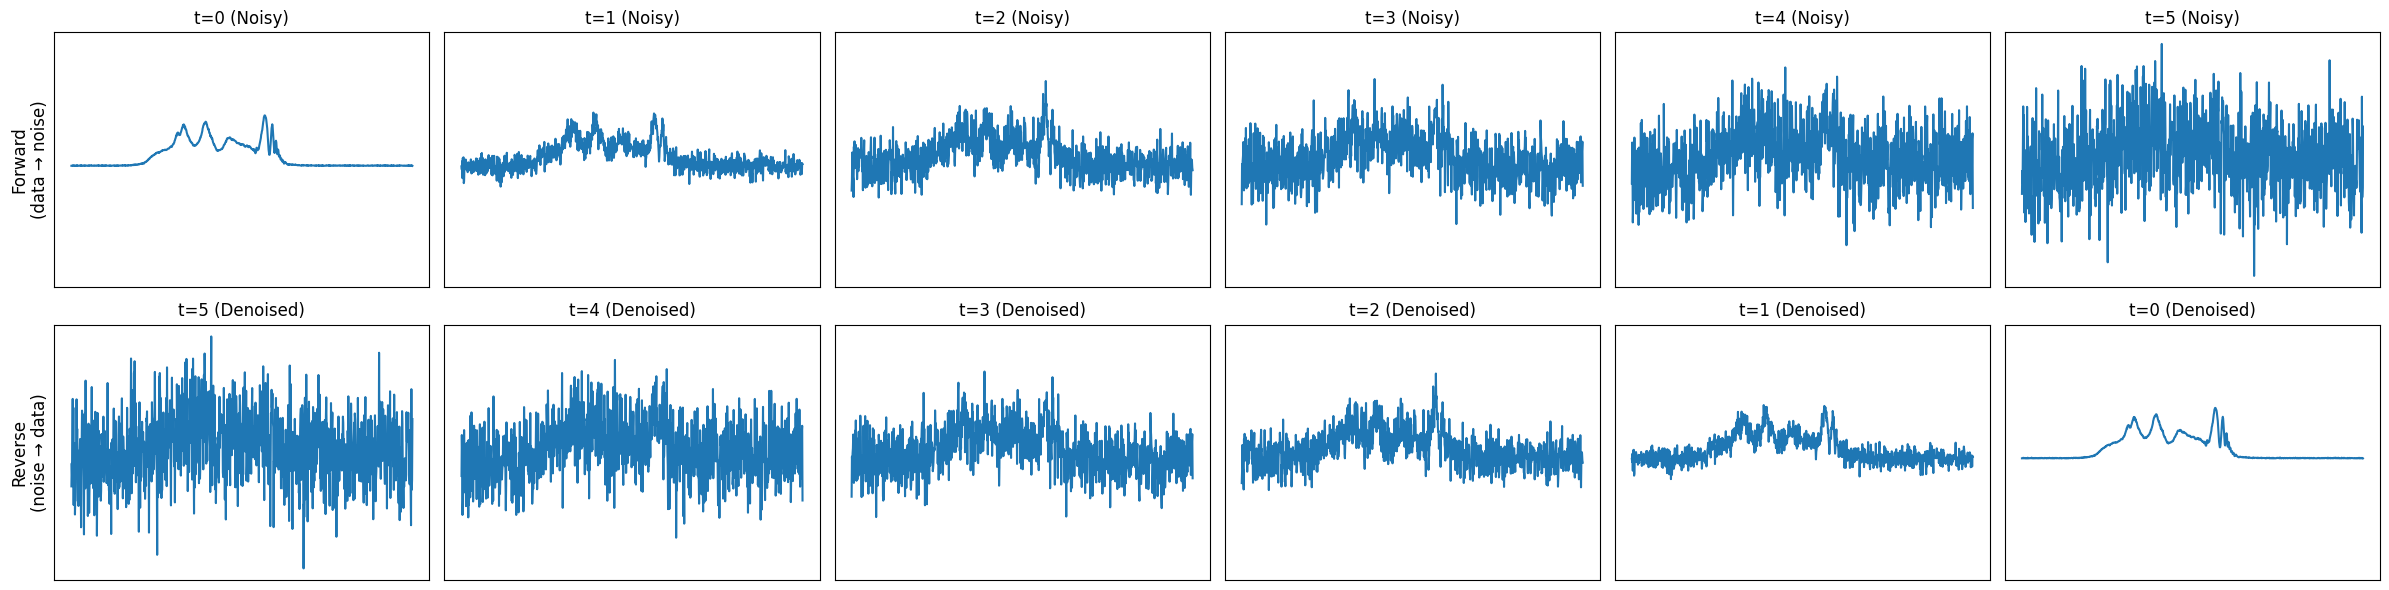

In [77]:
vector = np.array(data_val.iloc[1000]['intensities'])

# Set noise levels (simulating timesteps in SDE)
timesteps = 6
noise_levels = np.linspace(0, 500, timesteps)

# Create forward diffusion (data → noise)
forward_vectors = [vector + np.random.normal(0, noise, size=vector.shape) for noise in noise_levels]

# For reverse, let's just reverse the forward noise (for illustration)
reverse_vectors = forward_vectors[::-1]

# Plotting
fig, axs = plt.subplots(2, timesteps, figsize=(4 * timesteps, 6), sharey=True)

for i in range(timesteps):
    # Forward: x(0) → x(T)
    axs[0, i].plot(wavelengths, forward_vectors[i])
    axs[0, i].set_title(f"t={i} (Noisy)")
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    
    # Reverse: x(T) → x(0)
    axs[1, i].plot(wavelengths, reverse_vectors[i])
    axs[1, i].set_title(f"t={timesteps - i - 1} (Denoised)")
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])

axs[0, 0].set_ylabel("Forward\n(data → noise)", fontsize=12)
axs[1, 0].set_ylabel("Reverse\n(noise → data)", fontsize=12)

plt.tight_layout()
plt.show()


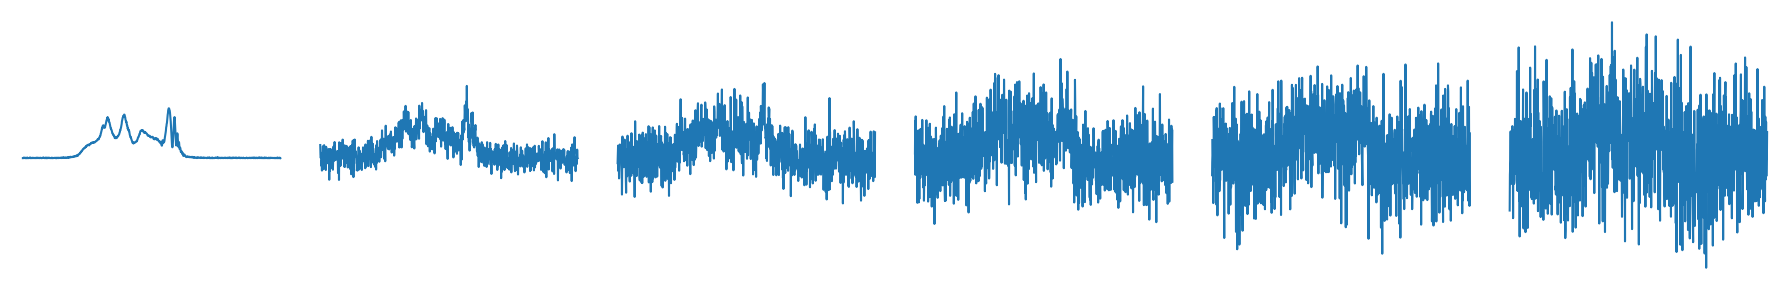

In [80]:
# Parameters
timesteps = 6
noise_levels = np.linspace(0, 600, timesteps)

# Generate noisy vectors (forward diffusion)
np.random.seed(42)
forward_vectors = [vector + np.random.normal(0, noise, size=vector.shape) for noise in noise_levels]

# Plot only the vectors with no axes or labels
fig, axs = plt.subplots(1, timesteps, figsize=(3 * timesteps, 3), sharey=True)

for i in range(timesteps):
    axs[i].plot(wavelengths, forward_vectors[i])
    axs[i].axis("off")  # Hide all axis elements

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)  # Reduce space between plots
plt.show()

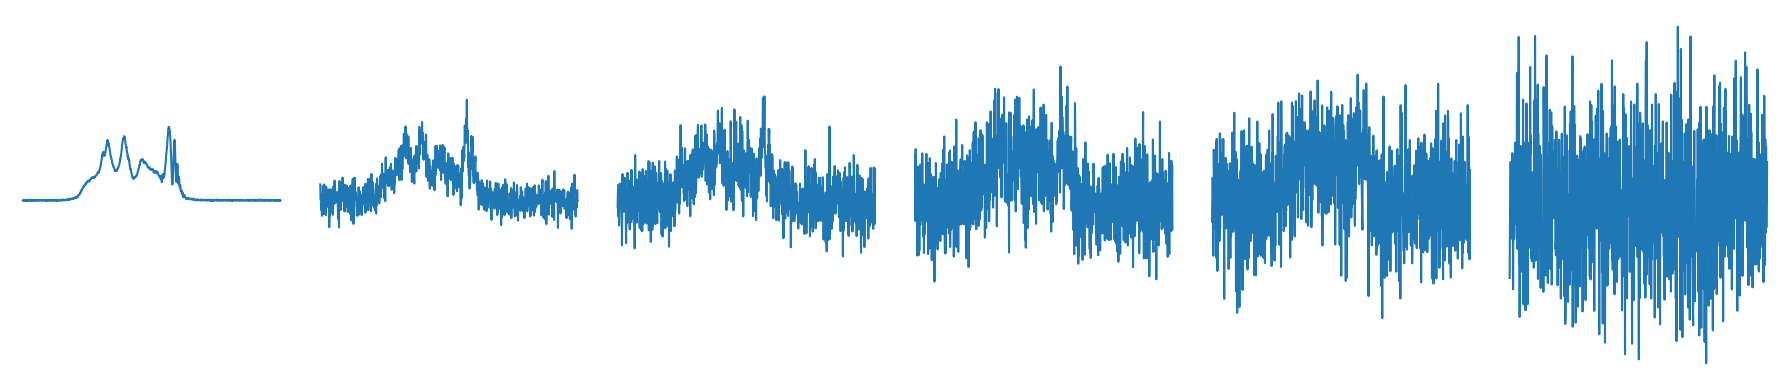

In [90]:
# Parameters
timesteps = 6
noise_levels = np.linspace(0, 500, timesteps)

# Generate noisy vectors (forward diffusion)
np.random.seed(42)
forward_vectors = [
    vector + np.random.normal(0, noise, size=vector.shape) if i < timesteps - 1
    else np.random.normal(0, 600, size=vector.shape)  # Final step: pure Gaussian noise
    for i, noise in enumerate(noise_levels)
]

# Plot only the vectors with no axes or labels
fig, axs = plt.subplots(1, timesteps, figsize=(3 * timesteps, 4), sharey=True)

for i in range(timesteps):
    axs[i].plot(wavelengths, forward_vectors[i])
    axs[i].axis("off")  # Hide all axis elements

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)  # Reduce space between plots
plt.show()

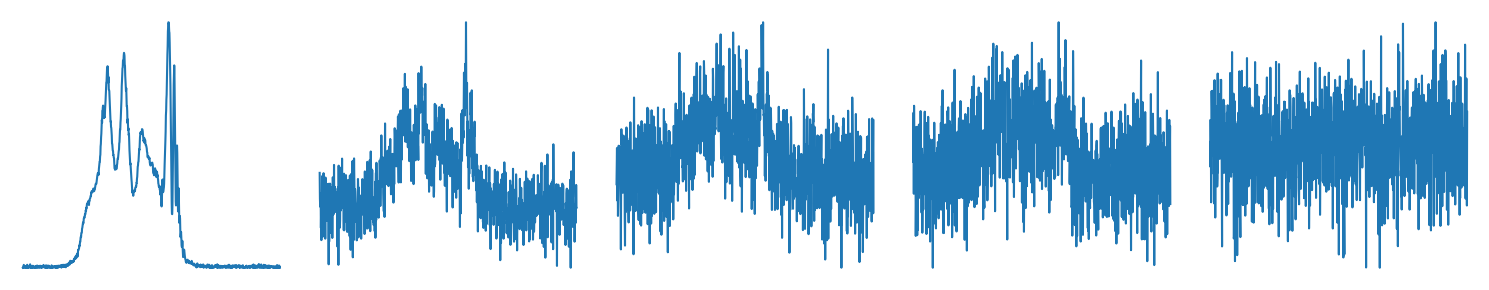

In [94]:
timesteps = 5
noise_levels = np.linspace(0, 500, timesteps)

# Generate and normalize noisy vectors (forward diffusion)
np.random.seed(42)
forward_vectors = []
for i, noise in enumerate(noise_levels):
    if i < timesteps - 1:
        noisy = vector + np.random.normal(0, noise, size=vector.shape)
    else:
        noisy = np.random.normal(0, 600, size=vector.shape)  # Pure noise for final step
    
    # Normalize to [0, 800]
    noisy = 800 * (noisy - noisy.min()) / (noisy.max() - noisy.min())
    forward_vectors.append(noisy)

# Plot only the vectors with no axes or labels
fig, axs = plt.subplots(1, timesteps, figsize=(3 * timesteps, 3), sharey=True)

for i in range(timesteps):
    axs[i].plot(wavelengths, forward_vectors[i])
    axs[i].axis("off")  # Hide all axis elements

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)  # Reduce space between plots
plt.savefig("noising_spectrum.png", bbox_inches='tight', dpi=300)
plt.show()